# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import urllib
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | axim
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | mejit
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | port saint john's
Processing Record 6 of Set 1 | atafu village
Processing Record 7 of Set 1 | toga village
City not found. Skipping...
Processing Record 8 of Set 1 | san antonio de pale
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | kingscliff
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | adrar
Processing Record 14 of Set 1 | st. john's
Processing Record 15 of Set 1 | argo
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | sao joao da barra
Processing Record 19 of Set 1 | al bardiyah
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Se

Processing Record 38 of Set 4 | acarau
Processing Record 39 of Set 4 | belyy yar
Processing Record 40 of Set 4 | bikenibeu village
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | emiliano zapata
Processing Record 43 of Set 4 | vorkuta
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | kimbe
Processing Record 46 of Set 4 | ta`u
Processing Record 47 of Set 4 | callao
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | tundla
Processing Record 0 of Set 5 | bardai
Processing Record 1 of Set 5 | usinsk
Processing Record 2 of Set 5 | camabatela
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | urangan
Processing Record 5 of Set 5 | garissa
Processing Record 6 of Set 5 | nyagan
Processing Record 7 of Set 5 | charikar
Processing Record 8 of Set 5 | hanceville
Processing Record 9 of Set 5 | ongjin
Processing Record 10 of Set 5 | cudillero
Processing Record 11 of Set 5 | novodvinsk
Processing Record 12 of S

Processing Record 31 of Set 8 | nahiyat ash shinafiyah
Processing Record 32 of Set 8 | nacala
Processing Record 33 of Set 8 | szigetvar
Processing Record 34 of Set 8 | kirakira
Processing Record 35 of Set 8 | harstad
Processing Record 36 of Set 8 | strathalbyn
Processing Record 37 of Set 8 | la sarre
Processing Record 38 of Set 8 | khodoriv
Processing Record 39 of Set 8 | sola
Processing Record 40 of Set 8 | angaur state
Processing Record 41 of Set 8 | les avirons
Processing Record 42 of Set 8 | camana
Processing Record 43 of Set 8 | zhanaozen
Processing Record 44 of Set 8 | luanda
Processing Record 45 of Set 8 | grande prairie
Processing Record 46 of Set 8 | bonthe
Processing Record 47 of Set 8 | santa vitoria do palmar
Processing Record 48 of Set 8 | ataq
Processing Record 49 of Set 8 | laboulaye
Processing Record 0 of Set 9 | labrador city
Processing Record 1 of Set 9 | rouissat
Processing Record 2 of Set 9 | sylvania
Processing Record 3 of Set 9 | laguna de perlas
Processing Record

Processing Record 17 of Set 12 | greymouth
Processing Record 18 of Set 12 | enewetak
Processing Record 19 of Set 12 | sydney
Processing Record 20 of Set 12 | vlore
Processing Record 21 of Set 12 | tobelo
Processing Record 22 of Set 12 | ishinomaki
Processing Record 23 of Set 12 | holualoa
Processing Record 24 of Set 12 | aq qayeh
City not found. Skipping...
Processing Record 25 of Set 12 | nelson bay
Processing Record 26 of Set 12 | willemstad
Processing Record 27 of Set 12 | el granada
Processing Record 28 of Set 12 | nanyamba
Processing Record 29 of Set 12 | eraan
Processing Record 30 of Set 12 | ungsang-nodongjagu
Processing Record 31 of Set 12 | el matama
Processing Record 32 of Set 12 | saint-jean-de-monts
Processing Record 33 of Set 12 | ascencion de guarayos
City not found. Skipping...
Processing Record 34 of Set 12 | codrington
Processing Record 35 of Set 12 | waterloo
Processing Record 36 of Set 12 | wanning
Processing Record 37 of Set 12 | balqash
Processing Record 38 of Set 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,axim,4.8699,-2.2405,85.96,66,99,8.55,GH,1683474105
1,grytviken,-54.2811,-36.5092,34.83,90,56,35.23,GS,1683474105
2,mejit,10.2753,170.8646,80.69,83,46,18.81,MH,1683474106
3,port mathurin,-19.6833,63.4167,78.80,72,1,21.70,MU,1683474106
4,port saint john's,-31.6229,29.5448,67.53,79,91,5.64,ZA,1683474106


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,axim,4.8699,-2.2405,85.96,66,99,8.55,GH,1683474105
1,grytviken,-54.2811,-36.5092,34.83,90,56,35.23,GS,1683474105
2,mejit,10.2753,170.8646,80.69,83,46,18.81,MH,1683474106
3,port mathurin,-19.6833,63.4167,78.80,72,1,21.70,MU,1683474106
4,port saint john's,-31.6229,29.5448,67.53,79,91,5.64,ZA,1683474106


In [13]:
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       593
Date          598
dtype: int64

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

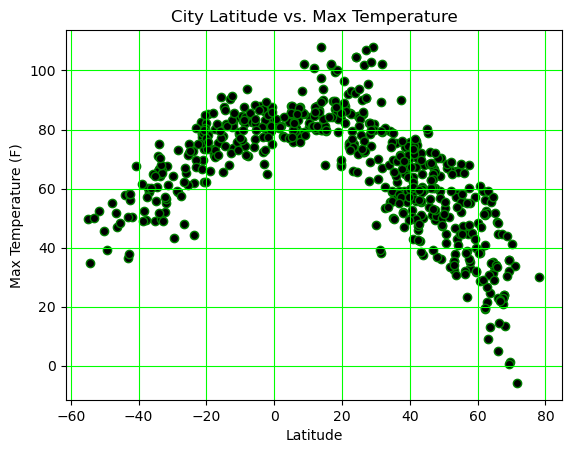

In [14]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="green",facecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True,which="major",axis="both",linestyle="-",color="lime")
            
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

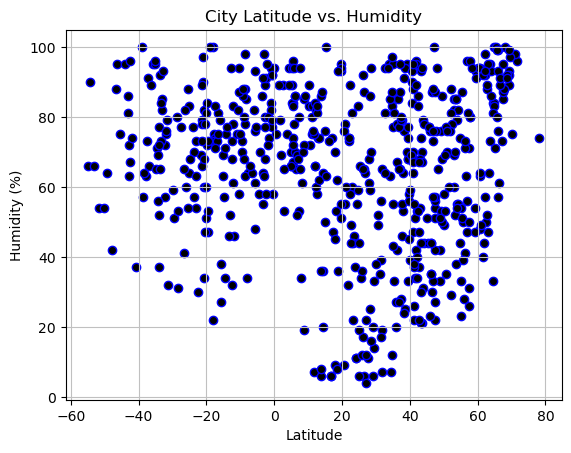

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="blue",facecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (True,which="major",axis="both",linestyle="-",color="silver")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

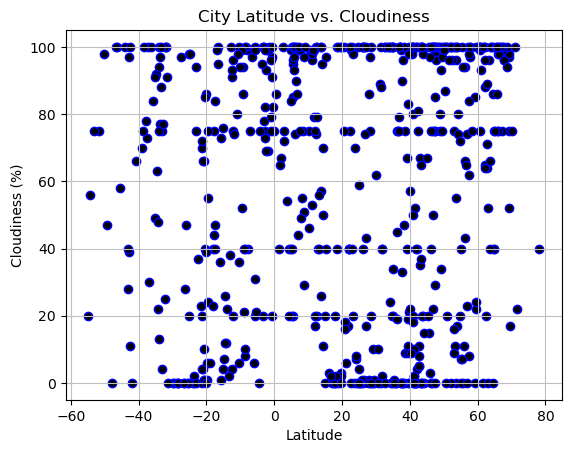

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="blue",facecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True,which="major",axis="both",linestyle="-",color="silver")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

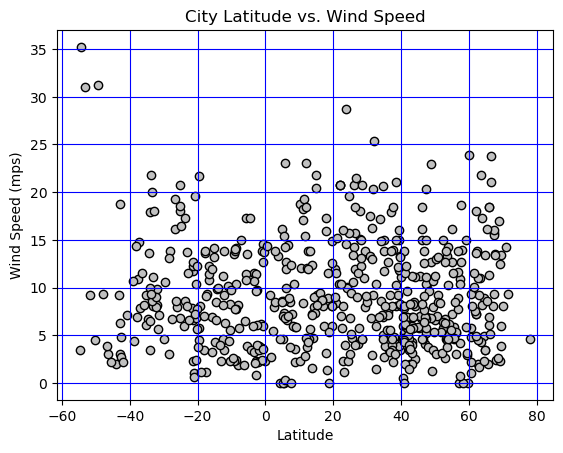

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="silver")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.grid (True,which="major",axis="both",linestyle="-",color="blue")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
Coor=round(linregress(city_data_df["Lat"],city_data_df["Max Temp"])[0],2)
line=linregress(city_data_df["Lat"],city_data_df["Max Temp"])
line

LinregressResult(slope=-0.2674125032209798, intercept=71.08900132599146, rvalue=-0.4433222642047044, pvalue=3.505175275085852e-30, stderr=0.02214739331876397, intercept_stderr=0.8385595845585125)

In [19]:
slope=-0.28744478625416114
intercept=68.73223359939507

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
north_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,axim,4.8699,-2.2405,85.96,66,99,8.55,GH,1683474105
2,mejit,10.2753,170.8646,80.69,83,46,18.81,MH,1683474106
11,adrar,20.5022,-10.0711,96.44,9,100,11.90,MR,1683474109
12,st. john's,47.5649,-52.7093,50.14,51,75,10.36,CA,1683474042
13,argo,37.6333,22.7333,75.78,46,33,2.24,GR,1683474110


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
south_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,34.83,90,56,35.23,GS,1683474105
3,port mathurin,-19.6833,63.4167,78.80,72,1,21.70,MU,1683474106
4,port saint john's,-31.6229,29.5448,67.53,79,91,5.64,ZA,1683474106
5,atafu village,-8.5421,-172.5159,83.66,78,8,14.16,TK,1683474107
6,san antonio de pale,-1.4014,5.6325,83.03,74,100,6.15,GQ,1683474107


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8151146075239862


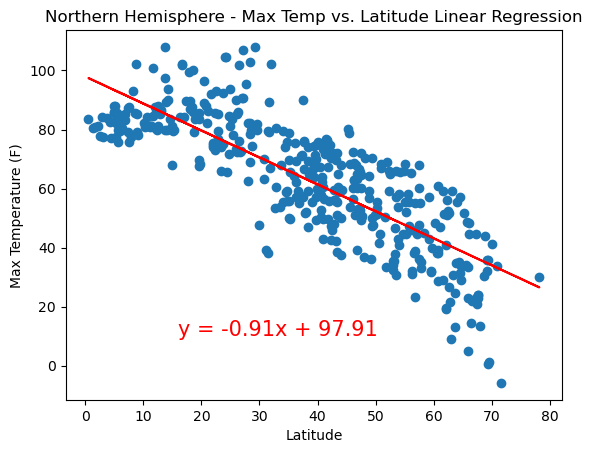

In [44]:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Fig5.png")

plt.show()

The r-value is: 0.8134578054225995


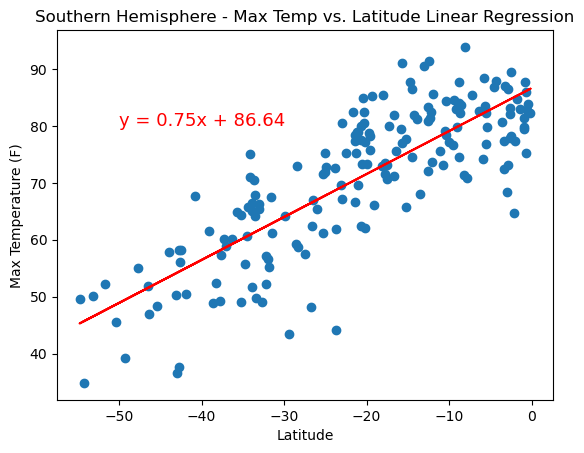

In [53]:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Southern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Fig6.png")

plt.show()

**Discussion about the linear relationship:** The closer you are to the equator "0" will likely result in an increase of temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14784850846911407


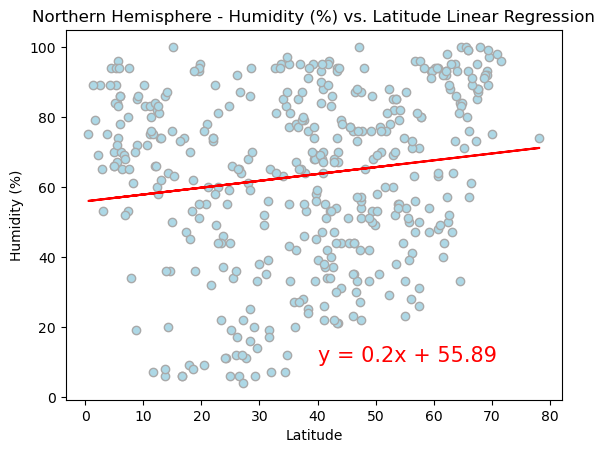

In [62]:
# Northern Hemisphere
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(x_values,y_values, marker = "o", facecolor = "lightblue", edgecolor="darkgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Fig7.png")

plt.show()

The r-value is: 0.07587149269483527


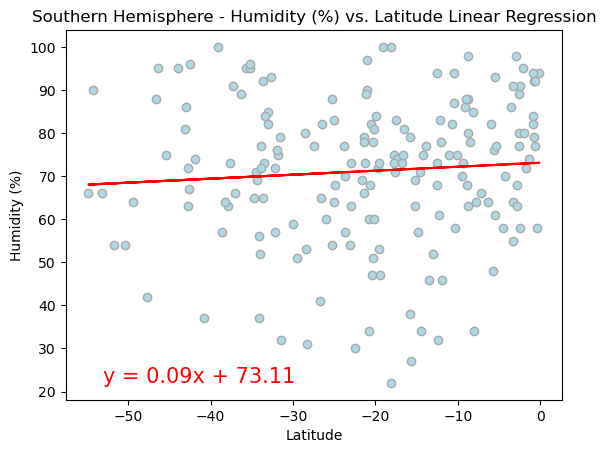

In [63]:
# Southern Hemisphere
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Southern Hemisphere
plt.scatter(x_values,y_values, marker = "o", facecolor = "lightblue", edgecolor="darkgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Fig8.png")

plt.show()

**Discussion about the linear relationship:** While there is humidity across the map, the more dense areas are within
(-40 to 40 Latitude).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11050568585246515


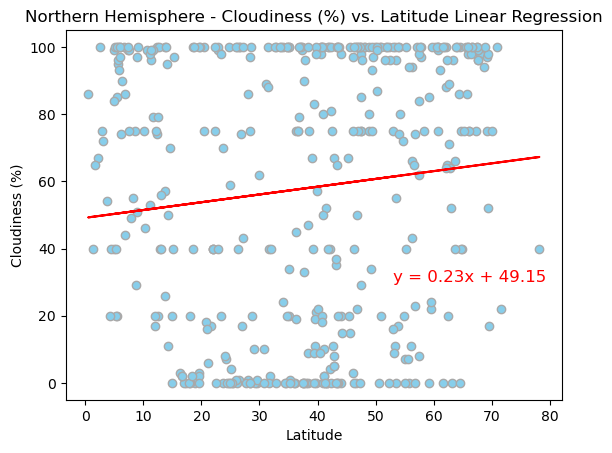

In [56]:
# Northern Hemisphere
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(x_values,y_values, marker = "o", facecolor = "skyblue", edgecolor="darkgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(53,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Fig9.png")

plt.show()

The r-value is: 0.08052090440024803


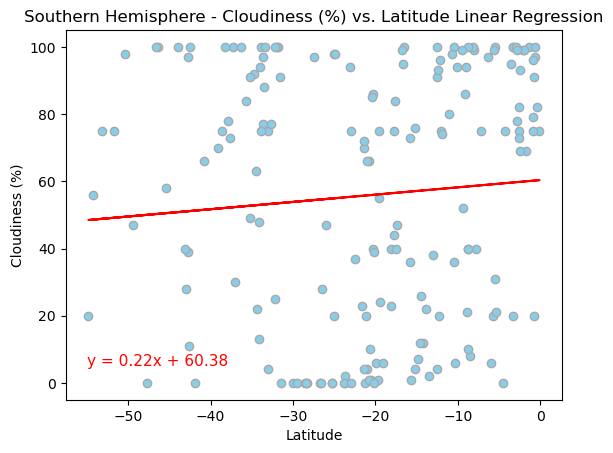

In [57]:
# Southern Hemisphere
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Southern Hemisphere
plt.scatter(x_values,y_values, marker = "o", facecolor = "skyblue", edgecolor = "darkgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=11,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship:** Looking at Northern vs Southern shows there is a higher density of cloudiness in the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06105530608746001


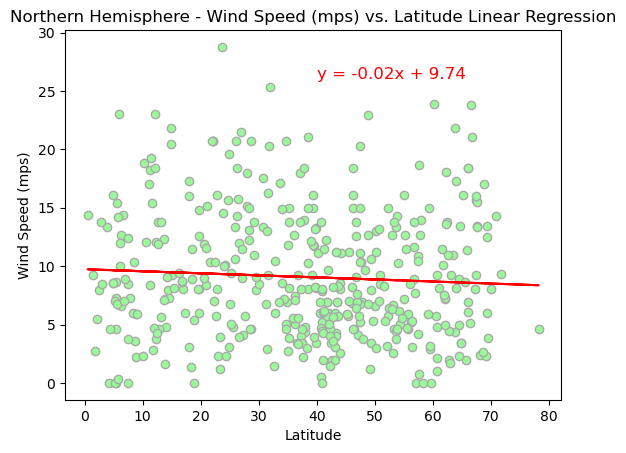

In [58]:
# Northern Hemisphere
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Northern Hemisphere
plt.scatter(x_values,y_values, marker = "o", facecolor = "palegreen", edgecolor="darkgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,26),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.title('Northern Hemisphere - Wind Speed (mps) vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Fig11.png")

plt.show()

The r-value is: -0.2171008779343603


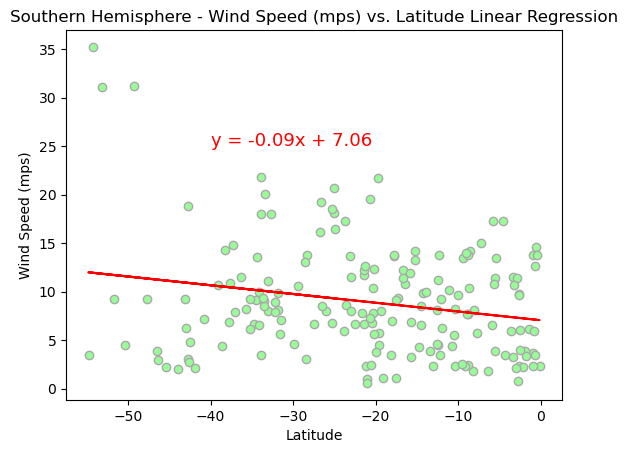

In [61]:
# Southern Hemisphere
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Linear regression on Southern Hemisphere
plt.scatter(x_values,y_values, marker = "o", facecolor = "palegreen", edgecolor="darkgray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.title('Southern Hemisphere - Wind Speed (mps) vs. Latitude Linear Regression')

print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Fig12.png")

plt.show()

**Discussion about the linear relationship:** Average wind speed for both hemispheres is 15(mps) or below.